# 正則化項（Regularization Term）

## Ridge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/Hitters.csv')
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


In [3]:
# 欠損値対応
df.dropna(inplace=True)
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


In [4]:
y_col = 'Salary'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

In [5]:
# 標準化のために数値列のみ抽出
numeric_cols = X.select_dtypes(include=np.number).columns.to_list()

# ダミー変数（ダミー変数も数値列として拾われるため数値列抽出の後に実施）
X = pd.get_dummies(X, drop_first=True)

# ホールドアウト
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled = X_test.copy()
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 学習
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# 予測
y_pred =ridge.predict(X_test_scaled)

In [6]:
# MSE
mean_squared_error(y_test, y_pred)

118513.26135456547

In [7]:
# MAE
mean_absolute_error(y_test, y_pred)

251.01058042384858

In [8]:
ridge.coef_

array([-255.99352472,  265.41620796,   49.85450911,  -43.4415344 ,
          6.40827279,  126.64463957,  -39.99788141, -180.02267219,
        242.39467113,  -36.09606293,  281.13852012,   46.31799934,
       -164.64027314,   70.88806172,   41.295514  ,  -34.06922615,
         -8.54724705,  -97.91075067,   35.72441367])

## RidgeとLinearRegressionの比較

In [9]:
# 学習
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# 予測
y_pred =reg.predict(X_test_scaled)

In [10]:
reg.coef_

array([-269.10981701,  272.90887884,   59.97669544,  -55.37512444,
          3.61504229,  131.08295524,  -14.78202567, -514.20110584,
        550.22369897,  -12.29554582,  299.04286135,    4.60615938,
       -156.78117836,   73.32237801,   54.94973217,  -35.64306984,
          1.59251626,  -95.02251105,   28.46798552])

## さまざまなλでのRidgeの精度比較

In [11]:
mse_list = []
coef_list = []

# 学習
alpha_list = np.logspace(-3, 3)

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # 予測
    y_pred =ridge.predict(X_test_scaled)
    
    mse_list.append(mean_squared_error(y_test, y_pred))
    coef_list.append(ridge.coef_)

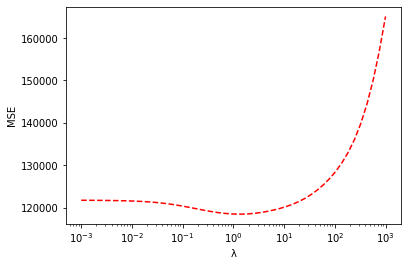

In [12]:
# MSE推移
plt.plot(alpha_list,
         mse_list,
         'r--')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()

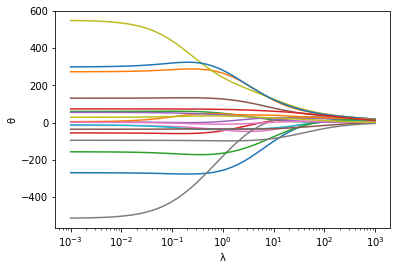

In [13]:
# θ推移
plt.plot(alpha_list,
         coef_list)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('θ')
plt.show()

## Lasso

In [14]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

# 予測
y_pred =lasso.predict(X_test_scaled)

In [15]:
# MSE
mean_squared_error(y_test, y_pred)

117768.90478161338

In [16]:
# MAE
mean_absolute_error(y_test, y_pred)

250.2448187711298

In [17]:
# Ridgeと違い0となる係数が発生
lasso.coef_

array([-263.93470404,  267.52882597,   42.60344047,  -33.86419872,
          7.61638806,  125.23251733,  -29.82564501, -239.24447846,
        330.30504107,   -4.11414372,  259.64536978,    0.        ,
       -160.99905107,   71.08401856,   40.14808014,  -30.18012969,
          0.        ,  -93.87340542,   25.7211037 ])

## さまざまなλでのLassoの精度比較

In [18]:
mse_list = []
coef_list = []

# 学習
alpha_list = np.logspace(-3, 3)

for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    # 予測
    y_pred =lasso.predict(X_test_scaled)
    
    mse_list.append(mean_squared_error(y_test, y_pred))
    coef_list.append(lasso.coef_)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4494940.432215456, tolerance: 3232.2294536983127
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3709012.0625044014, tolerance: 3232.2294536983127
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2991103.3514170116, tolerance: 3232.2294536983127
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dual

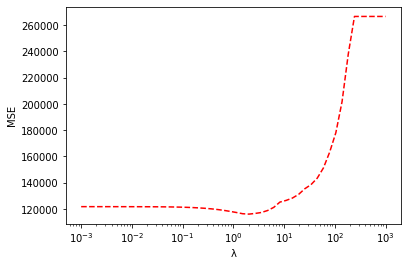

In [19]:
# MSE推移
plt.plot(alpha_list,
         mse_list,
         'r--')
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('MSE')
plt.show()

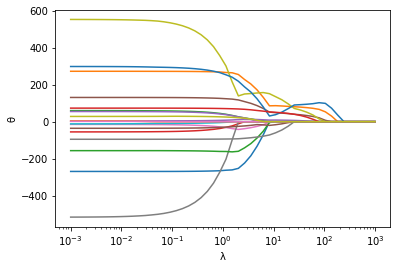

In [20]:
# θ推移
plt.plot(alpha_list,
         coef_list)
plt.xscale('log')
plt.xlabel('λ')
plt.ylabel('θ')
plt.show()

In [39]:
# MSE最小での係数（値0のものは、使わないほうが良いということになる）
pd.DataFrame({'coef': coef_list[np.argmin(mse_list)], 'column_name': X_train_scaled.columns})

,coef,column_name
0,-252.192228,AtBat
1,254.955174,Hits
2,26.344767,HmRun
3,-11.164490,Runs
4,11.554622,RBI
5,117.619609,Walks
6,-41.936832,Years
7,-0.000000,CAtBat
8,139.314907,CHits
9,-0.000000,CHmRun
